# Feed-forward Neural Networks with Sequential and Functional Keras

## Imports

In [1]:
import tensorflow.keras as tk
import pandas as pd
import matplotlib.pyplot as plt

## Load data

In [2]:
(X_train_full, y_train_full), (x_test, y_test) = tk.datasets.mnist.load_data()
X_test, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_test, y_train = y_train_full[:5000], y_train_full[5000:]
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(55000, 28, 28) (55000,)
(5000, 28, 28) (5000,)


## Sequential model

In [3]:
model = tk.models.Sequential()

model.add(tk.layers.Flatten(input_shape=[28, 28]))
model.add(tk.layers.Dense(256, activation="relu"))
model.add(tk.layers.Dense(128, activation="relu"))
model.add(tk.layers.Dense(10, activation="softmax"))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


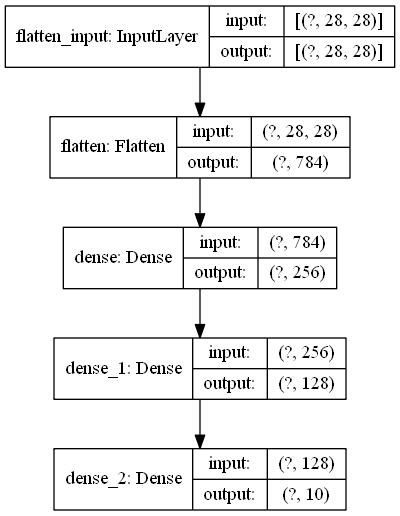

In [4]:
model.summary()
tk.utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [12]:
inp = tk.layers.Flatten(input_shape=[28, 28])
hid1 = tk.layers.Dense(256, activation="relu")
hid2 = tk.layers.Dense(128, activation="relu")
out = tk.layers.Dense(10, activation="softmax")

model = tk.models.Sequential([inp, hid1, hid2, out])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_10 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


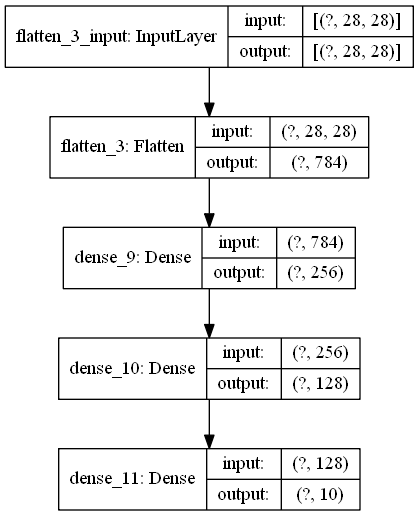

In [13]:
model.summary()
tk.utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [14]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
res = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
1719/1719 [==============================] - 3s 2ms/step - loss: 0.6215 - accuracy: 0.8390 - val_loss: 0.3082 - val_accuracy: 0.9116
Epoch 2/20
1719/1719 [==============================] - 3s 1ms/step - loss: 0.2907 - accuracy: 0.9161 - val_loss: 0.2426 - val_accuracy: 0.9316
Epoch 3/20
1719/1719 [==============================] - 3s 1ms/step - loss: 0.2364 - accuracy: 0.9330 - val_loss: 0.2044 - val_accuracy: 0.9450
Epoch 4/20
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2017 - accuracy: 0.9429 - val_loss: 0.1786 - val_accuracy: 0.9516
Epoch 5/20
1719/1719 [==============================] - 3s 1ms/step - loss: 0.1754 - accuracy: 0.9499 - val_loss: 0.1611 - val_accuracy: 0.9554
Epoch 6/20
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1554 - accuracy: 0.9554 - val_loss: 0.1442 - val_accuracy: 0.9608
Epoch 7/20
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1389 - accuracy: 0.9614 - val_loss: 0.1321 - val_accuracy:

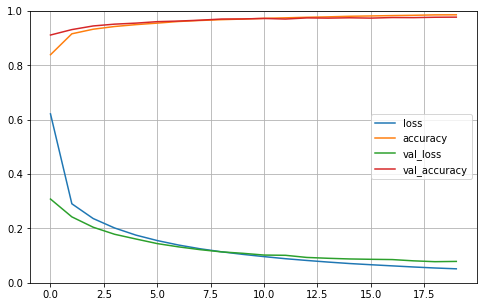

In [15]:
pd.DataFrame(res.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) 
plt.show()

## Functional model

In [16]:
inp = tk.layers.Input(shape=[28, 28])
flat1 = tk.layers.Flatten(input_shape=[28, 28])(inp)
hid1 = tk.layers.Dense(2**14, activation="relu")(flat1)
hid2 = tk.layers.Dense(512, activation='relu')(hid1)
hid3 = tk.layers.Dense(28*28, activation='relu')(hid2)
resh = tk.layers.Reshape((28, 28))(hid3)
conc = tk.layers.Concatenate()([inp, resh])
flat2 = tk.layers.Flatten(input_shape=[28, 28])(conc)
out  = tk.layers.Dense(10, activation='softmax')(flat2)

model = tk.Model(inputs=[inp], outputs=[out] )

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
flatten_4 (Flatten)             (None, 784)          0           input_1[0][0]                    
__________________________________________________________________________________________________
dense_12 (Dense)                (None, 16384)        12861440    flatten_4[0][0]                  
__________________________________________________________________________________________________
dense_13 (Dense)                (None, 512)          8389120     dense_12[0][0]                   
______________________________________________________________________________________________

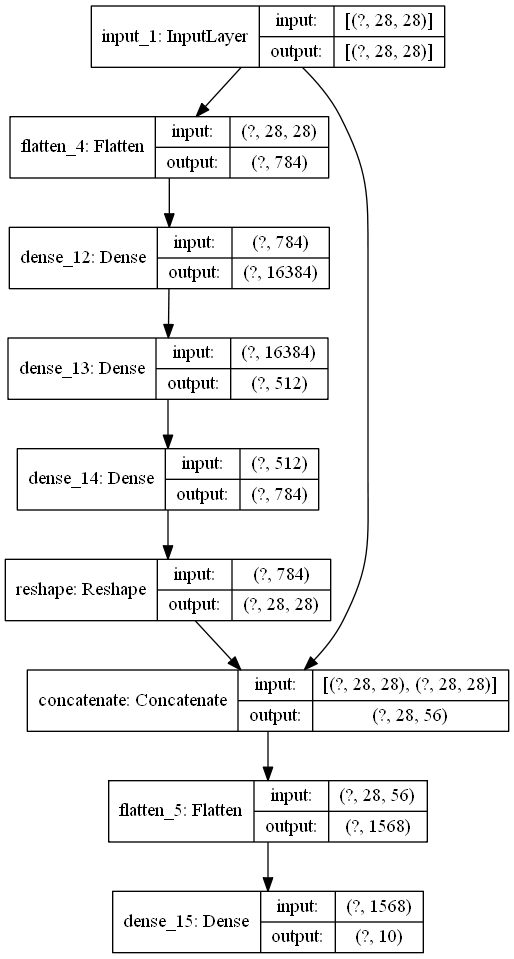

In [17]:
model.summary()
tk.utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [20]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
res = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1719/1719 [==============================] - 85s 49ms/step - loss: 0.5823 - accuracy: 0.8594 - val_loss: 0.2898 - val_accuracy: 0.9186
Epoch 2/10
1719/1719 [==============================] - 86s 50ms/step - loss: 0.2673 - accuracy: 0.9248 - val_loss: 0.2104 - val_accuracy: 0.9416
Epoch 3/10
1719/1719 [==============================] - 88s 51ms/step - loss: 0.2054 - accuracy: 0.9415 - val_loss: 0.1697 - val_accuracy: 0.9554
Epoch 4/10
1719/1719 [==============================] - 86s 50ms/step - loss: 0.1647 - accuracy: 0.9539 - val_loss: 0.1439 - val_accuracy: 0.9600
Epoch 5/10
1719/1719 [==============================] - 85s 49ms/step - loss: 0.1349 - accuracy: 0.9613 - val_loss: 0.1261 - val_accuracy: 0.9654
Epoch 6/10
1719/1719 [==============================] - 90s 52ms/step - loss: 0.1116 - accuracy: 0.9685 - val_loss: 0.1085 - val_accuracy: 0.9702
Epoch 7/10
1719/1719 [==============================] - 89s 52ms/step - loss: 0.0939 - accuracy: 0.9736 - val_loss: 0.0982 -

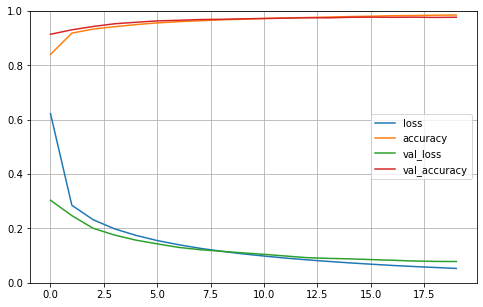

In [17]:
pd.DataFrame(res.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) 
plt.show()

## Credits & Links

https://medium.com/@hanify/sequential-api-vs-functional-api-model-in-keras-266823d7cd5e